<a href="https://colab.research.google.com/github/helloJomz/CCINSYSL_ASSIGNMENT_COM-DF211/blob/main/exercise_5_b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 5 B

In [163]:
import numpy as np
from sklearn.datasets import fetch_olivetti_faces
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

In [164]:
faces = fetch_olivetti_faces()

In [165]:
faces.data.shape

(400, 4096)

In [166]:
faces.images.shape

(400, 64, 64)

In [167]:
faces.target.shape

(400,)

In [168]:
faces.target[200]

20

#### 1. Plot the image of index zero

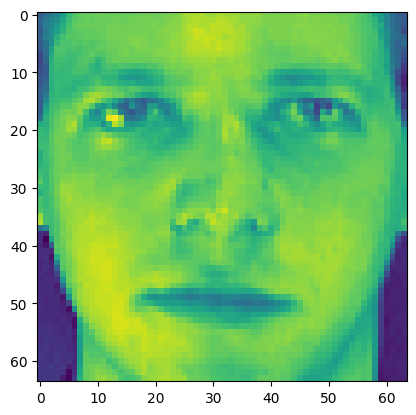

In [169]:
# put your answer here
plt.imshow(faces.images[0])

#### 2. Create a subplot of 10 images in a 3x3 configuration

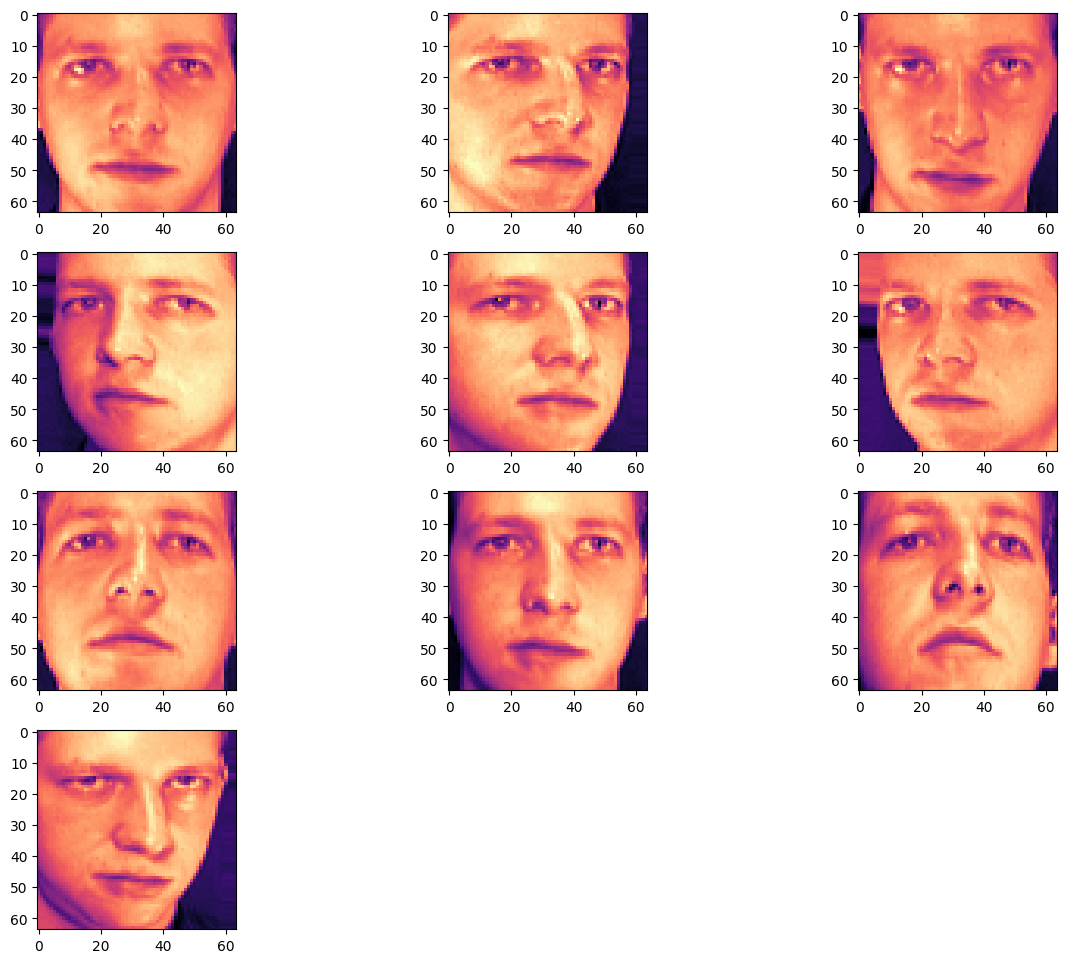

In [193]:
# put your answer here

plt.figure(figsize=(15,15))
for index, (data, image) in enumerate(zip(faces.data[0:10], faces.images[0:10])):
    plt.subplot(5, 3, index + 1)
    plt.imshow(image, cmap=plt.cm.magma)

#### 3. Split the data into a training and test set

In [187]:
# put your answer here
from sklearn.model_selection import train_test_split

train_img, test_img, train_data, test_data = train_test_split(
    faces.data, faces.target, test_size=1/7.0, random_state=1300)

#### 4. Create a new instance of the LogisticRegression class

In [172]:
# put your answer here
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()

#### 5. Train the model using the training set using the `fit()` function

In [173]:
# put your answer here
logisticRegr.fit(train_img, train_data)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### 6. Use the test data to test the model using the `predict()` function

In [174]:
# put your answer here

logisticRegr.predict(test_img[0].reshape(1,-1))


array([13])

#### 7. Get the accuracy using the `score()` function

In [175]:
# put your answer here
score = logisticRegr.score(test_img, test_data)
print(score)

0.9655172413793104


#### 8. Collect all the misclassified images and create a plot for visualization

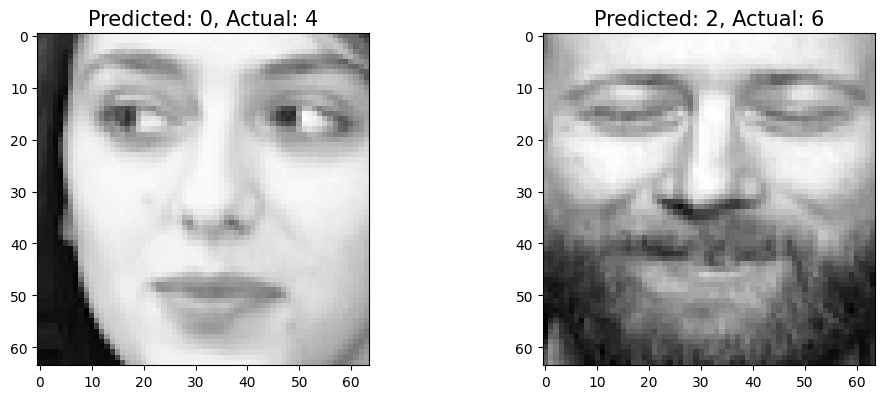

In [176]:
# put your answer here

predictions = logisticRegr.predict(test_img)

index = 0
misclassifiedIndexes = []
for label, predict in zip(test_data, predictions):
    if label != predict:
        misclassifiedIndexes.append(index)
    index +=1

plt.figure(figsize=(25,25))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:10]):
    plt.subplot(5, 4, plotIndex + 1)
    plt.imshow(np.reshape(test_img[badIndex], (64, 64)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(predictions[badIndex], test_lbl[badIndex]), fontsize = 15)

## Gradient Descent

#### 9. Use the `SGDClassifier()` to use gradient descent to minimize the loss

In [177]:
# put your answer here

from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(loss="log_loss", penalty="l2")



#### 10. Train the model using the training set using the `fit()` function

In [178]:
# put your answer here
clf.fit(train_img, train_data)

SGDClassifier(loss='log_loss')

#### 11. Use the test data to test the model using the `predict()` function

In [179]:
# put your answer here
y_pred = clf.predict(test_img)


#### 12. Get the accuracy using the `score()` function

In [188]:
# put your answer here
score = clf.score(test_img, test_data)
print(score)

0.9482758620689655


#### 13. Find the best number of iterations to get the best accuracy

[0.8448275862068966, 0.8448275862068966, 0.8620689655172413, 0.9310344827586207, 0.9482758620689655, 0.8793103448275862, 0.8275862068965517, 0.9137931034482759, 0.896551724137931, 0.8793103448275862, 0.7931034482758621]


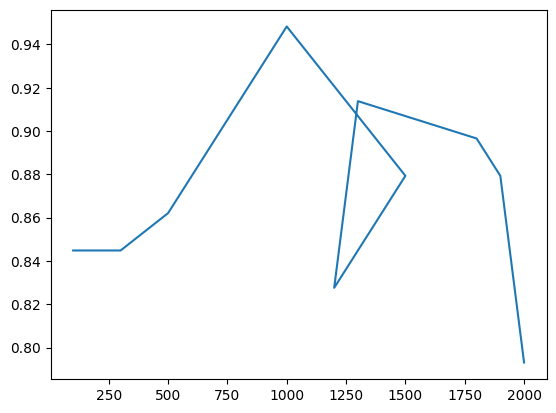

In [190]:
# put your answer here
num_iter = [100, 300, 500, 900, 1000, 1500, 1200, 1300, 1800, 1900, 2000]
scores_list = []

for i in num_iter:
  clf = SGDClassifier(loss="log_loss", penalty="l2", max_iter=i)
  clf.fit(train_img, train_data)
  y_pred = clf.predict(test_img)
  score = clf.score(test_img, test_data)
  scores_list.append(score)

plt.plot(num_iter, scores_list)
print(scores_list)

